Provide your project leader with a formula that estimates the compressive strength. Include:

The average strength of the concrete samples at 1, 7, 14, and 28 days of age.
The coefficients β0, β1 ... β8, to use in the following formula: Concrete Strength = β0 + β1 ∗ cement + β2 ∗ slag + β3 ∗ fly ash + β4 ∗ water + β5 ∗ superplasticizer + β6 ∗ coarse aggregate + β7 ∗ fine aggregate + β8 ∗ age.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('concrete_data.csv')
df.head(5)
#showing first five rows of the dataset

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


We can see that there are nine columns in our dataset and below is a description of what they are about in this dataset: 
1. cement - chemical substance that binds materials such as sand and gravel together
2. slag - stony waser matter separated from metals during the smelting or refining of ore
3. fly_ash - fine powder that is a byproduct of burning pulverized coal in electric generation power plants.
4. water 
5. superplasticizer - water reducer, to help in making high strength concrete.
6. coarse_aggregate - irregular,broken stones or naturally occurring round gravel used to make concrete
7. fine_aggregate - natural sand particles collected from the land through the mining process
8. age - the time elapsed since the concrete was poured in place and left to set
9. strength - measure of an unreinforced concrete slab or beam to resist failure in bending.

The target output/what we're looking to predict is strength.
Apart from age, each column is measured in kg/m^3.

In [5]:
#looking at more information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   fly_ash           1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarse_aggregate  1030 non-null   float64
 6   fine_aggregate    1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


There are no missing values in our datasets. Let's check for if duplicates are present

In [6]:
df.duplicated().sum()

25

In [7]:
df.drop_duplicates(inplace=True)

We can see that all the columns are numeric and, apart from age, contain floats. The age column contains integers.

We can also see that the dataframe contains 1030 rows and is not missing any values.

Now let's look at the statistics of the dataframe.

In [8]:
df.describe()

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.629055,72.043134,55.535075,182.074378,6.031647,974.376468,772.686617,45.856716,35.250273
std,104.345003,86.170555,64.207448,21.340740,5.919559,77.579534,80.339851,63.734692,16.284808
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.680000,0.000000,0.000000,166.610000,0.000000,932.000000,724.300000,7.000000,23.523542
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.798114
75%,349.000000,142.500000,118.270000,192.940000,10.000000,1031.000000,822.200000,56.000000,44.868340
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


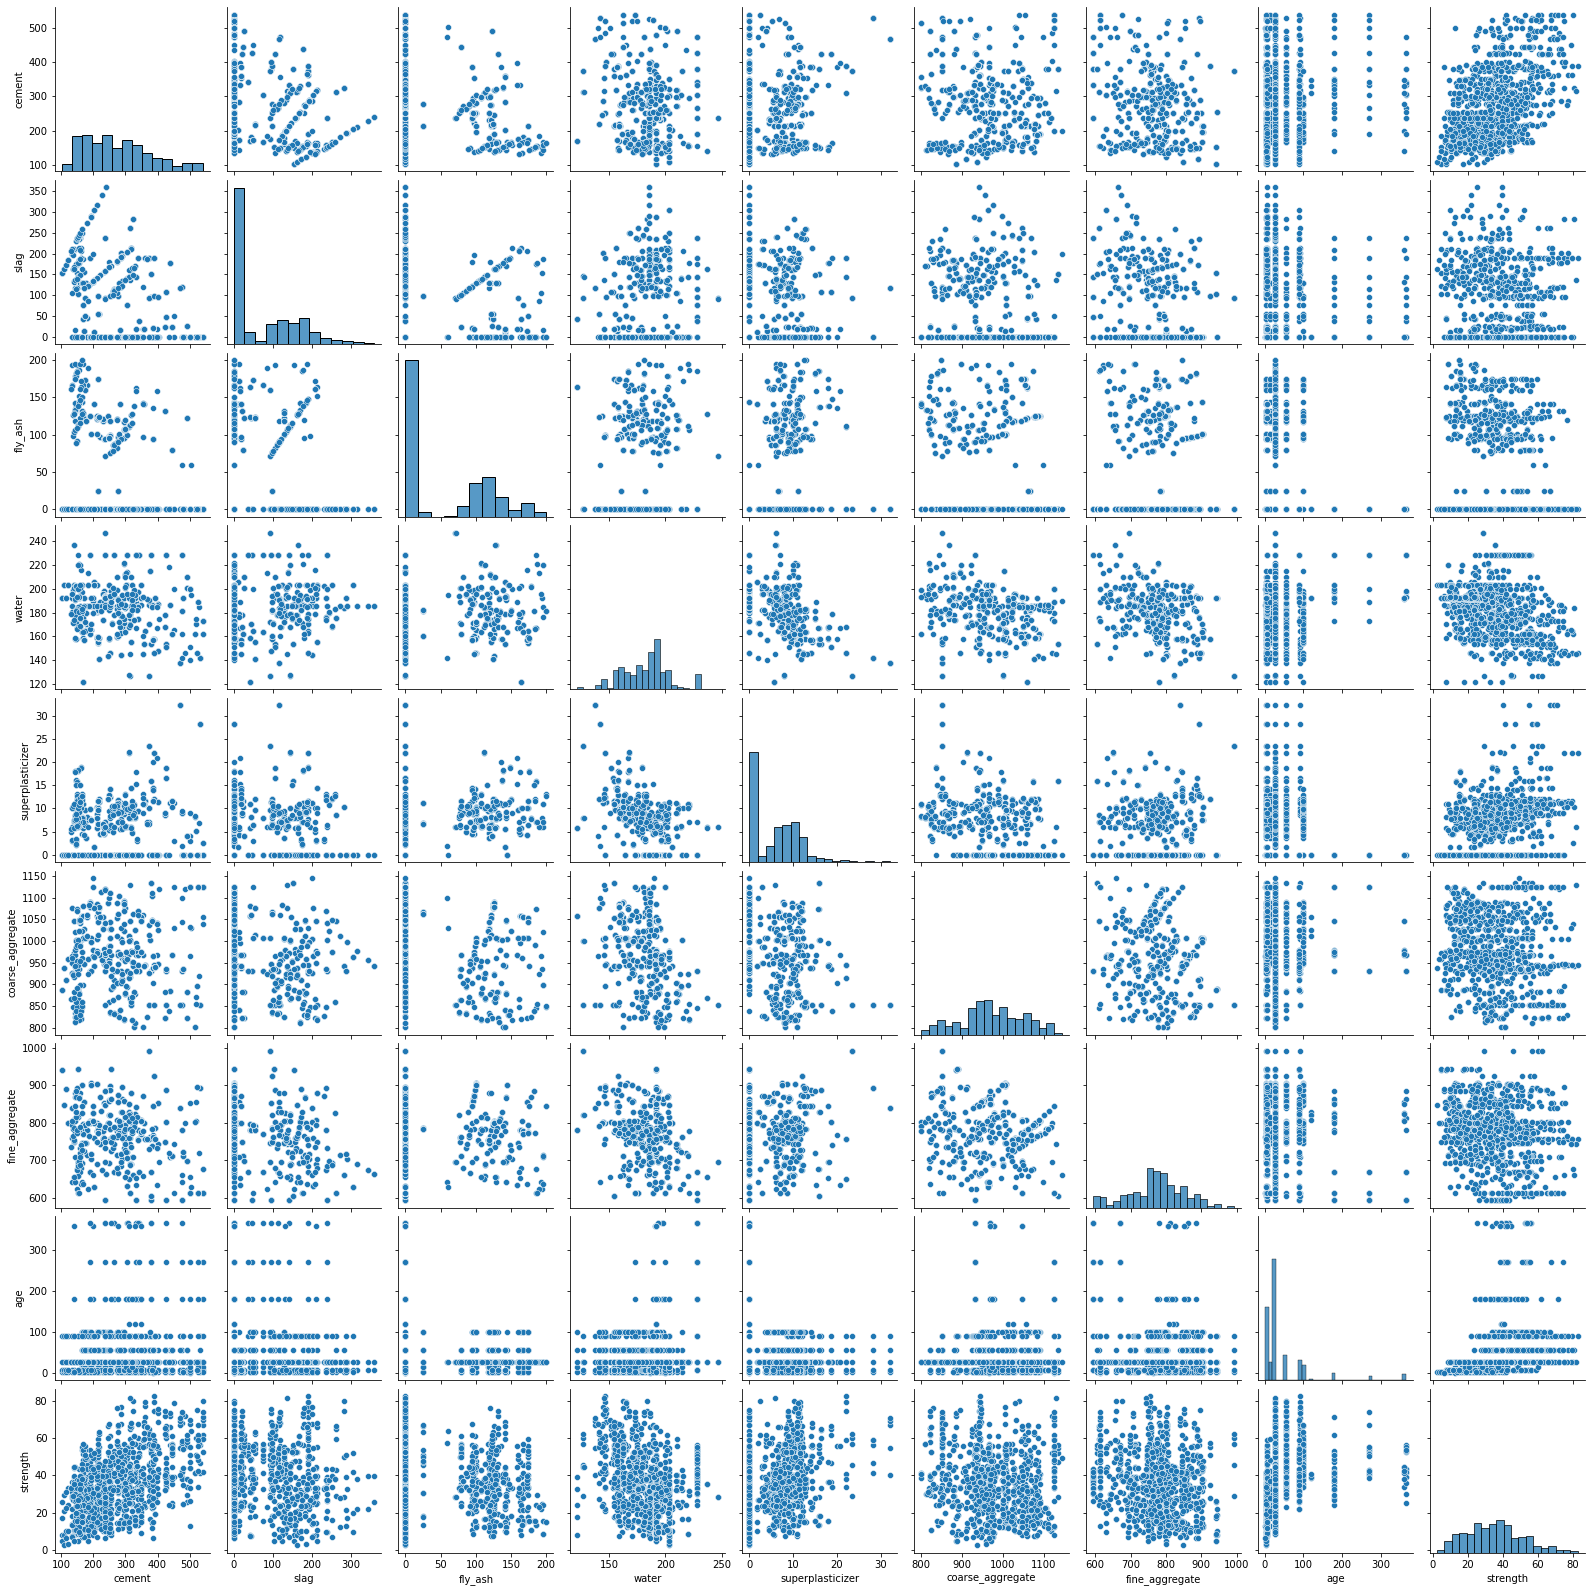

In [9]:
sns.pairplot(df)

From the pairplot above, we can see a correlation between cement and strength. There isn't any other really linear relationship observable.

We can use a heatmap to look at what the other relationships really look like.

Text(0.5, 1.0, 'Feature Correlation Heatmap')

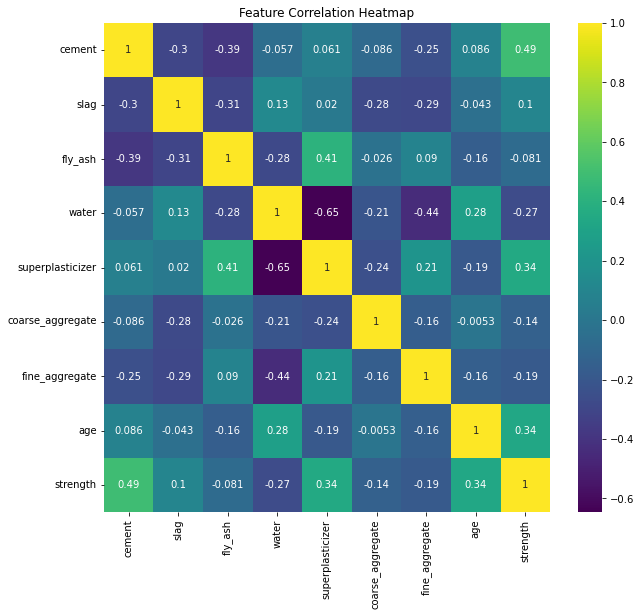

In [10]:
corr = df.corr() 

plt.figure(figsize=(10,9))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title("Feature Correlation Heatmap")

We can see a correlation between strength and two other features: superplasticizer and age. 

There is a strong negative correlation between superplasticizer and water. Probably due to the former being a water reducer.

There is also a notable positive correlation between super plasticizer and fly ash as well as fine aggregate.

Let us have a look at the distribution of the target feature.

<AxesSubplot:xlabel='strength', ylabel='Density'>

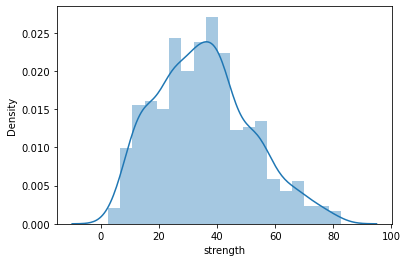

In [11]:
sns.distplot(df['strength'])

We can see that strength has a normal distribution and lightly right-skewed. Normal distribution is ideal if we're going to build a linear regression model.

In [12]:
df.columns

Index(['cement', 'slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age', 'strength'],
      dtype='object')

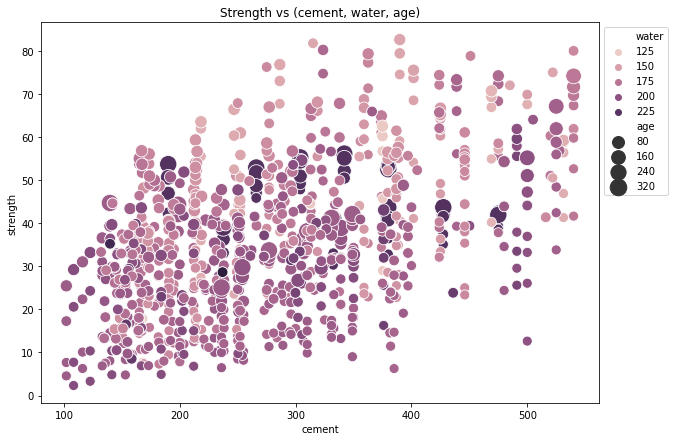

In [13]:
fig,ax = plt.subplots(figsize = (10,7))
sns.scatterplot(y='strength',x='cement',hue='water',size='age',data=df,sizes=(100,300))
ax.set_title("Strength vs (cement, water, age)")
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

From the graph above, we can see the following observations:
1. Strength increases with amount of cement
2. Strength increases with age
3. Concrete with low age requires more cement for higher strength
4. The older the cement is, the more water it requires
5. Strength increases when less water is used in preparing it.

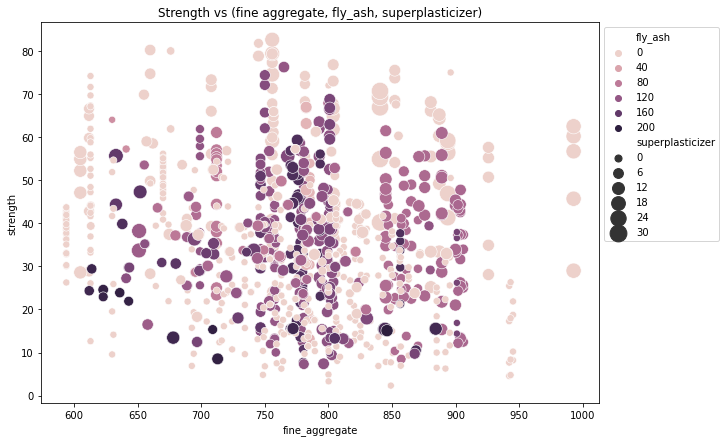

In [14]:
fig,ax = plt.subplots(figsize = (10,7))
sns.scatterplot(y='strength',x='fine_aggregate',hue='fly_ash',size='superplasticizer',data=df,sizes=(50,300))
ax.set_title("Strength vs (fine aggregate, fly_ash, superplasticizer)")
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

Observations from our scatterplot above,

1. For the most part, as flyash increases, the strength decreases
2. Strength increases with super plasticizer

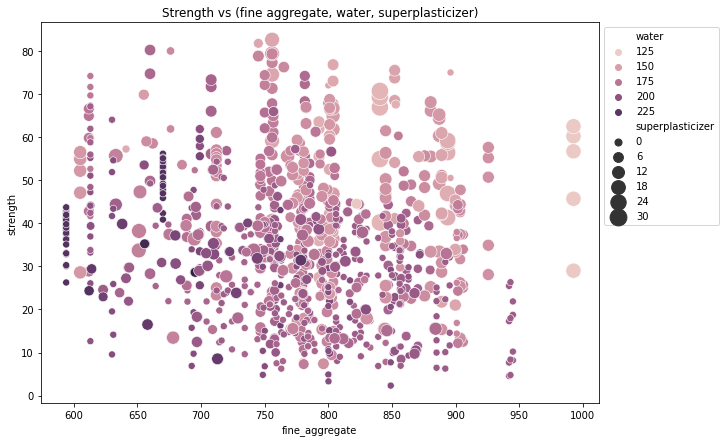

In [276]:
fig,ax = plt.subplots(figsize = (10,7))
sns.scatterplot(y='strength',x='fine_aggregate',hue='water',size='superplasticizer',data=df,sizes=(50,300))
ax.set_title("Strength vs (fine aggregate, water, superplasticizer)")
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

Observations from the scatterplot above:
1. Strength decreases with increase in water, strength increases in super plasticizer
2. When there is less water, more fine aggregate is used as well as more super plasticizer

## Analysis of each attribute using plots
Including checking for outliers

### Cement:-

Text(0, 0.5, 'Cement')

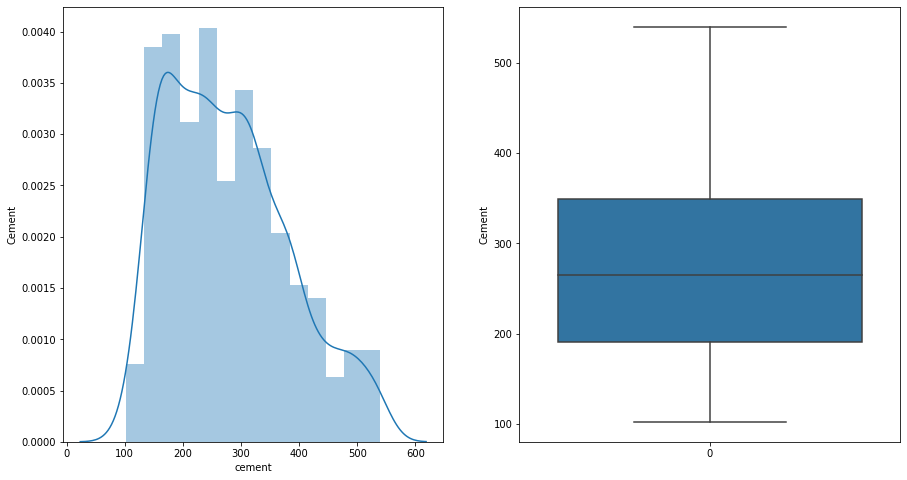

In [277]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
fig = sns.distplot(df['cement'])
fig.set_ylabel('Cement')

plt.subplot(1,2,2)
fig = sns.boxplot(df['cement'])
fig.set_ylabel('Cement')

From the graph above, we can see that there are no outliers in cement column and it looks like normally distributed. 

Text(0, 0.5, 'Slag')

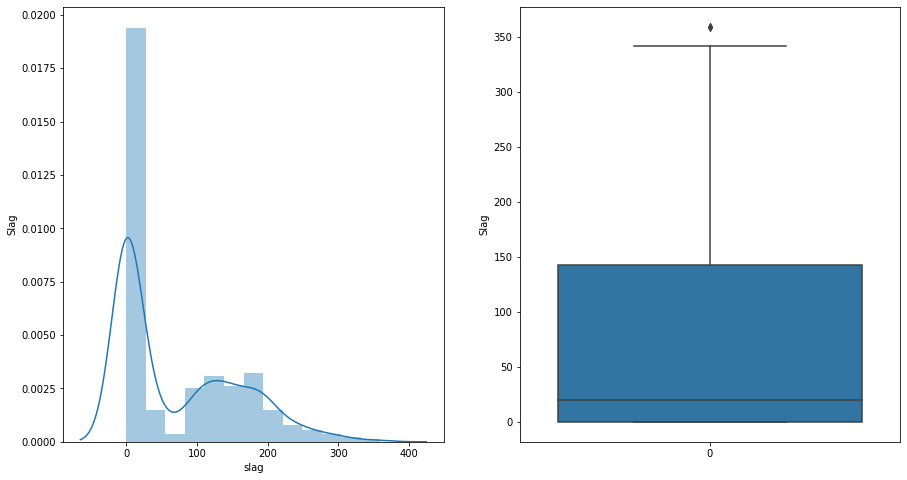

In [278]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
fig = sns.distplot(df['slag'])
fig.set_ylabel('Slag')

plt.subplot(1,2,2)
fig = sns.boxplot(df['slag'])
fig.set_ylabel('Slag')

From the plot above,we can see that the distribution for slag is right skewed and an outlier value is present.

Text(0, 0.5, 'Flyash')

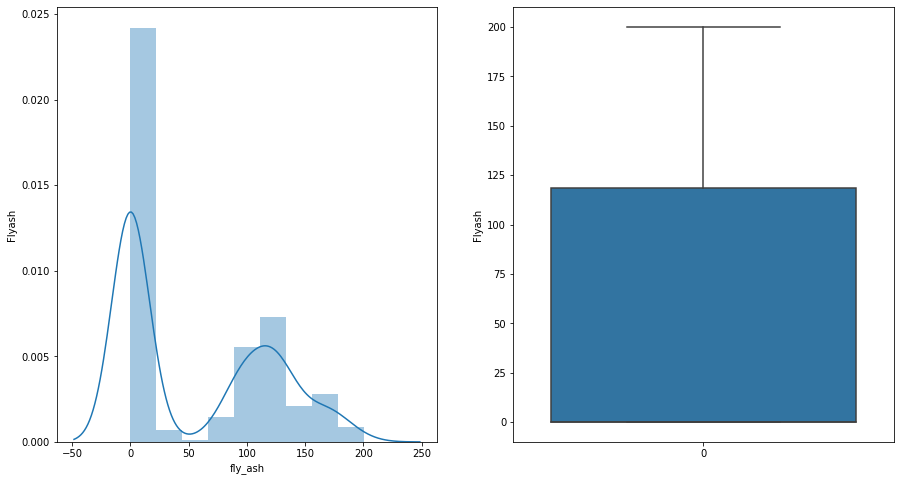

In [279]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
fig = sns.distplot(df['fly_ash'])
fig.set_ylabel('Flyash')

plt.subplot(1,2,2)
fig = sns.boxplot(df['fly_ash'])
fig.set_ylabel('Flyash')

From the plot above, we can see that the distribution is right skewed and there are no outliers present

Text(0, 0.5, 'Water')

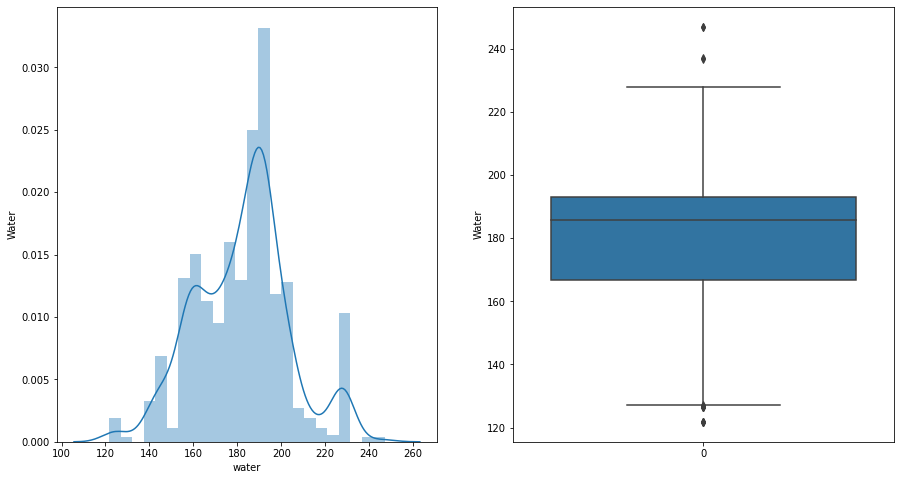

In [280]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
fig = sns.distplot(df['water'])
fig.set_ylabel('Water')

plt.subplot(1,2,2)
fig = sns.boxplot(df['water'])
fig.set_ylabel('Water')

One can see that the distribution for the water column is somewhat normal and there exists outliers.

Text(0, 0.5, 'Superplasticizer')

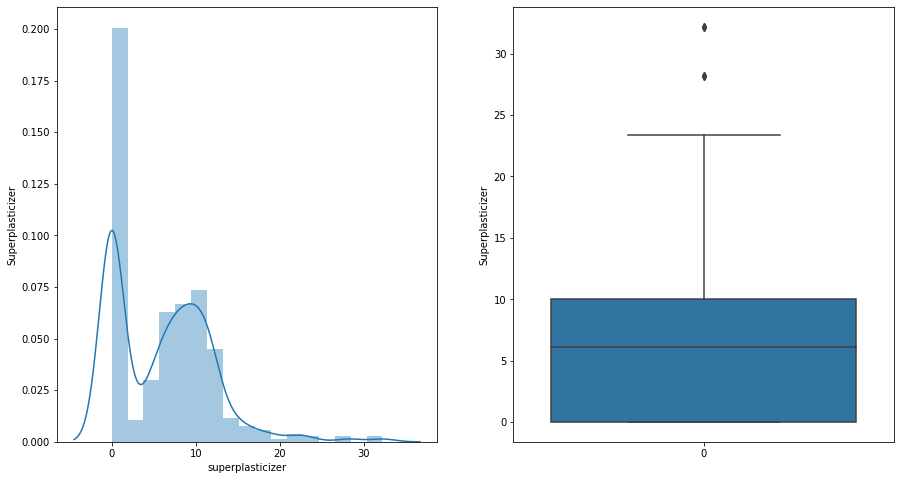

In [281]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
fig = sns.distplot(df['superplasticizer'])
fig.set_ylabel('Superplasticizer')

plt.subplot(1,2,2)
fig = sns.boxplot(df['superplasticizer'])
fig.set_ylabel('Superplasticizer')

One can see that the distribution for the superplasticizer is right skewed. There are also some outliers that are present.

Text(0, 0.5, 'Coarse aggregate')

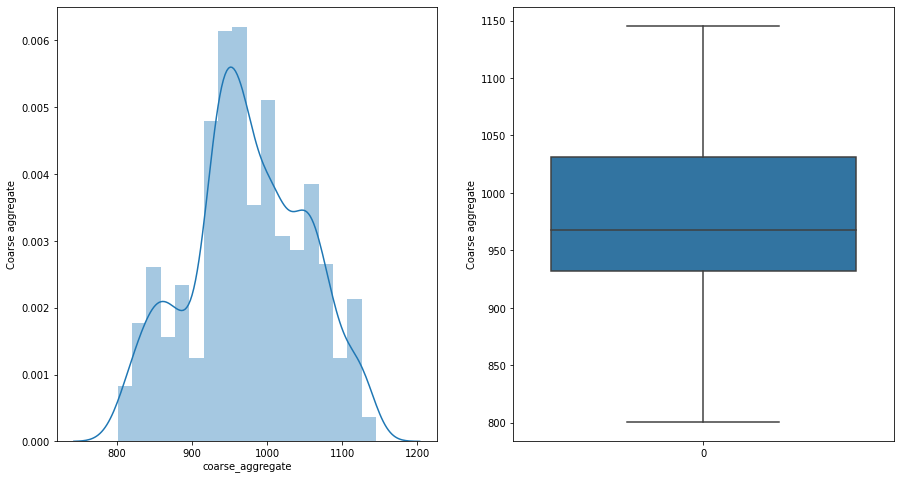

In [282]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
fig = sns.distplot(df['coarse_aggregate'])
fig.set_ylabel('Coarse aggregate')

plt.subplot(1,2,2)
fig = sns.boxplot(df['coarse_aggregate'])
fig.set_ylabel('Coarse aggregate')

Coarse aggregate has a somewhat normal distribution and there are no outliers present.

Text(0, 0.5, 'Fine aggregate')

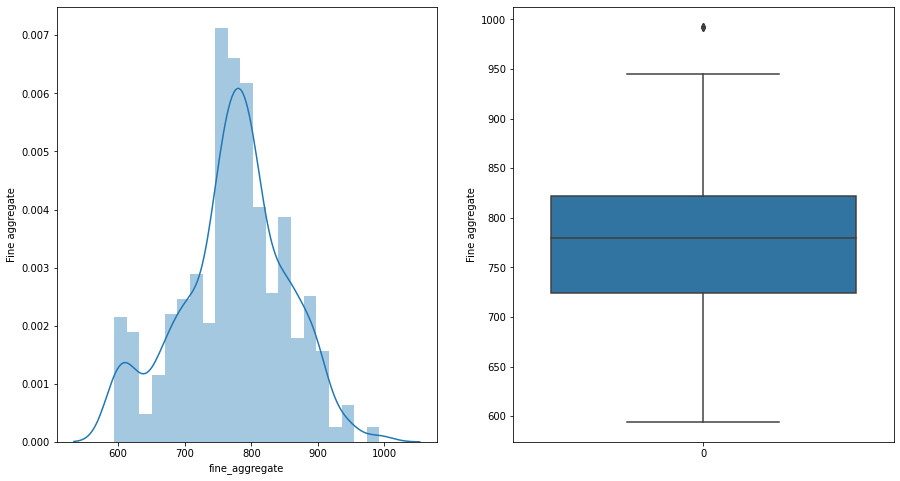

In [283]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
fig = sns.distplot(df['fine_aggregate'])
fig.set_ylabel('Fine aggregate')

plt.subplot(1,2,2)
fig = sns.boxplot(df['fine_aggregate'])
fig.set_ylabel('Fine aggregate')

Fine aggregate has a somewhat normal distribution and an outlier is present in the boxplot

Text(0, 0.5, 'Age')

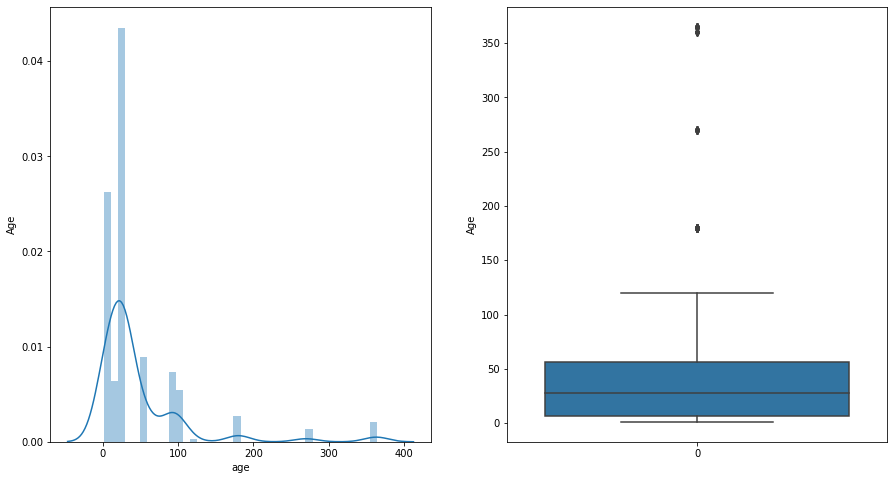

In [284]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
fig = sns.distplot(df['age'])
fig.set_ylabel('Age')

plt.subplot(1,2,2)
fig = sns.boxplot(df['age'])
fig.set_ylabel('Age')

From above, we can see that there are outliers in age column and the data is right skewed.

<AxesSubplot: title={'center': 'A boxplot graph showing the original dataframe with the outliers in the columns'}>

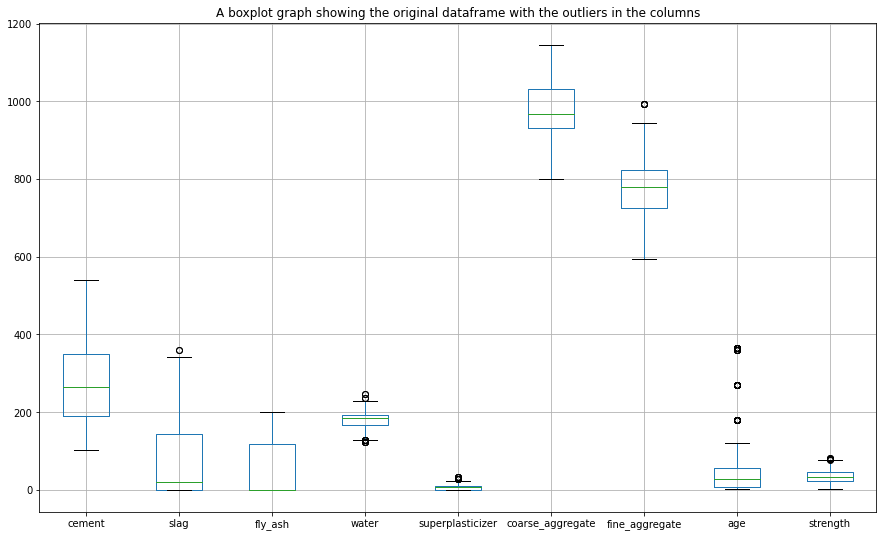

In [285]:
#Looking at the outliers
plt.figure(figsize=(15,9))
plt.title("A boxplot graph showing the original dataframe with the outliers in the columns")
df.boxplot()

Despite the presence of outliers, I am going to go ahead and use this dataframe with outliers as they signify naturally occurring values while trying to test the strength of concrete.

# Data Preprocessing

In [286]:
#Separating our input features(X) and the target variable(y)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [287]:
#Splitting data into training and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=2)

## Scaling of the values

for our data, all of the input features apart from age, are of the same unit. Therefore, we are going to perform feature scaling on our input features.
Using standard scaler so the features have a mean of zero and standard deviation of 1.

In [288]:
standardization =StandardScaler()
X_train = standardization.fit_transform(X_train)
X_test = standardization.transform(X_test)

print('\nAfter standardization : \n',X_train) 


After standardization : 
 [[-0.87000308 -0.82826783  1.10768192 ...  1.47441452  0.40913518
  -0.65806687]
 [-0.30032889  1.11161021 -0.84460387 ...  0.04088118 -0.97305033
  -0.2861836 ]
 [ 1.57370012 -0.54914869  0.38530504 ... -0.09430968 -0.74794688
  -0.59856554]
 ...
 [-0.76165778 -0.70033822  1.35055    ... -0.41315607  0.37128259
  -0.59856554]
 [-0.25438742 -0.82826783 -0.84460387 ... -1.07890732  2.18217071
  -0.65806687]
 [-0.45719986 -0.82826783  0.62786176 ... -0.34887664  1.01465089
   0.13032566]]


### Model building

#### Linear regression

In [289]:
model = LinearRegression()

In [290]:
#fitting the linear regression model
model.fit(X_train, y_train)

LinearRegression()

In [291]:
#making prediction on the test data
y_prediction = model.predict(X_test)

In [292]:
print("Model\t\t\t  RMSE \t\t MSE  \t\t MAE \t\tR2 ") 
print("""LinearRegression \t{:.2f} \t\t{:.2f} \t\t{:.2f} \t\t{:.2f}""".format(mean_squared_error(y_test, y_prediction,squared=False), mean_squared_error(y_test, y_prediction),mean_absolute_error(y_test, y_prediction),r2_score(y_test, y_prediction)))


Model			  RMSE 		 MSE  		 MAE 		R2 
LinearRegression 	10.32 		106.51 		8.13 		0.58


In [293]:
model.score(X_train,y_train) 

0.6064579146501207

In [294]:
model.score(X_test,y_test) 

0.5842965778854126

We can see that the model is failing to generalise, that is it is overfitting and therefore we will employ lasso and ridge regression to combat this.

#### Lasso regression

In [295]:
lasso = Lasso()

In [296]:
#fitting the lasso regression model
lasso.fit(X_train, y_train)

Lasso()

In [297]:
y_prediction_lasso = lasso.predict(X_test)

In [298]:
print("Model\t\t\t  RMSE \t\t MSE  \t\t MAE \t\tR2 ") 
print("""LassoRegression \t{:.2f} \t\t{:.2f} \t\t{:.2f} \t\t{:.2f}""".format(mean_squared_error(y_test, y_prediction,squared=False), mean_squared_error(y_test, y_prediction),mean_absolute_error(y_test, y_prediction),r2_score(y_test, y_prediction)))


Model			  RMSE 		 MSE  		 MAE 		R2 
LassoRegression 	10.32 		106.51 		8.13 		0.58


The lasso regression model has the same values as the linear model across the evaluation metrics 

#### RIdge regression

In [299]:
ridge = Ridge()

In [300]:
#fitting the lasso regression model
ridge.fit(X_train, y_train)

Ridge()

In [301]:
y_prediction_ridge = ridge.predict(X_test)

In [302]:
print("Model\t\t\t  RMSE \t\t MSE  \t\t MAE \t\tR2 ") 
print("""RidgeRegression \t{:.2f} \t\t{:.2f} \t\t{:.2f} \t\t{:.2f}""".format(mean_squared_error(y_test, y_prediction,squared=False), mean_squared_error(y_test, y_prediction),mean_absolute_error(y_test, y_prediction),r2_score(y_test, y_prediction)))


Model			  RMSE 		 MSE  		 MAE 		R2 
RidgeRegression 	10.32 		106.51 		8.13 		0.58


The performance seems to be the same across all the three models

Curious to see if the models perform better if outliers are removed so will proceed to use data with initial outliers removed to rebuild the models.

### Datapreprocessing to remove outliers

In [303]:
#Splitting data into training and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=2)

Let's look at the outliers again according to the training data.

<AxesSubplot: title={'center': 'A boxplot graph showing the original dataframe with the outliers in the columns'}>

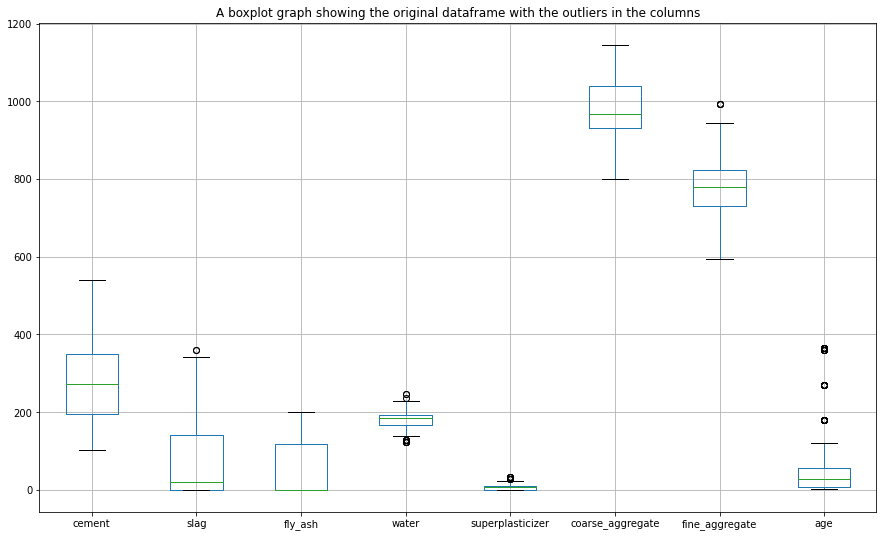

In [304]:
plt.figure(figsize=(15,9))
plt.title("A boxplot graph showing the original dataframe with the outliers in the columns")
X_train.boxplot()

In [305]:
#Using IQR concept to find the real number of outliers
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

outlierDf = find_outliers_IQR(X_train)

outlierDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804 entries, 199 to 192
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            0 non-null      float64
 1   slag              2 non-null      float64
 2   fly_ash           0 non-null      float64
 3   water             14 non-null     float64
 4   superplasticizer  10 non-null     float64
 5   coarse_aggregate  0 non-null      float64
 6   fine_aggregate    4 non-null      float64
 7   age               53 non-null     float64
dtypes: float64(8)
memory usage: 56.5 KB


In [306]:
def remove_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    df = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return df

X_train_no_outliers = remove_outliers_IQR(X_train)
X_train_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804 entries, 199 to 192
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            804 non-null    float64
 1   slag              802 non-null    float64
 2   fly_ash           804 non-null    float64
 3   water             790 non-null    float64
 4   superplasticizer  794 non-null    float64
 5   coarse_aggregate  804 non-null    float64
 6   fine_aggregate    800 non-null    float64
 7   age               751 non-null    float64
dtypes: float64(8)
memory usage: 56.5 KB


In [307]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 37 to 680
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            201 non-null    float64
 1   slag              201 non-null    float64
 2   fly_ash           201 non-null    float64
 3   water             201 non-null    float64
 4   superplasticizer  201 non-null    float64
 5   coarse_aggregate  201 non-null    float64
 6   fine_aggregate    201 non-null    float64
 7   age               201 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 14.1 KB


In [308]:
#Using IQR concept to find the real number of outliers
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

outlierDf = find_outliers_IQR(X_test)

outlierDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 37 to 680
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            0 non-null      float64
 1   slag              0 non-null      float64
 2   fly_ash           0 non-null      float64
 3   water             1 non-null      float64
 4   superplasticizer  0 non-null      float64
 5   coarse_aggregate  0 non-null      float64
 6   fine_aggregate    1 non-null      float64
 7   age               6 non-null      float64
dtypes: float64(8)
memory usage: 14.1 KB


In [309]:
X_test_no_outliers = remove_outliers_IQR(X_test)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 37 to 680
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            201 non-null    float64
 1   slag              201 non-null    float64
 2   fly_ash           201 non-null    float64
 3   water             201 non-null    float64
 4   superplasticizer  201 non-null    float64
 5   coarse_aggregate  201 non-null    float64
 6   fine_aggregate    201 non-null    float64
 7   age               201 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 14.1 KB


In [310]:
#Replacing the removed outliers with median of the training data in the training data first, then in the test data

In [311]:
for df in [X_train_no_outliers, X_test_no_outliers]:
    for col in df.columns:
        df[col].fillna(X_train_no_outliers[col].median(), inplace = True)
        

In [312]:
X_train_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804 entries, 199 to 192
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            804 non-null    float64
 1   slag              804 non-null    float64
 2   fly_ash           804 non-null    float64
 3   water             804 non-null    float64
 4   superplasticizer  804 non-null    float64
 5   coarse_aggregate  804 non-null    float64
 6   fine_aggregate    804 non-null    float64
 7   age               804 non-null    float64
dtypes: float64(8)
memory usage: 56.5 KB


In [313]:
X_test_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 37 to 680
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            201 non-null    float64
 1   slag              201 non-null    float64
 2   fly_ash           201 non-null    float64
 3   water             201 non-null    float64
 4   superplasticizer  201 non-null    float64
 5   coarse_aggregate  201 non-null    float64
 6   fine_aggregate    201 non-null    float64
 7   age               201 non-null    float64
dtypes: float64(8)
memory usage: 14.1 KB


## Scaling of the values


In [314]:
standardization =StandardScaler()
X_train = standardization.fit_transform(X_train_no_outliers)
X_test = standardization.transform(X_test_no_outliers)

print('\nAfter standardization : \n',X_train)


After standardization : 
 [[-0.87000308 -0.82974951  1.10768192 ...  1.47441452  0.43087701
  -1.04280592]
 [-0.30032889  1.13698263 -0.84460387 ...  0.04088118 -0.97878318
  -0.13294791]
 [ 1.57370012 -0.54676647  0.38530504 ... -0.09430968 -0.74920519
  -0.89722864]
 ...
 [-0.76165778 -0.70004895  1.35055    ... -0.41315607  0.39227199
  -0.89722864]
 [-0.25438742 -0.82974951 -0.84460387 ... -1.07890732  2.23915642
  -1.04280592]
 [-0.45719986 -0.82974951  0.62786176 ... -0.34887664  1.04842899
   0.88609306]]


In [315]:
model = LinearRegression()
lasso = Lasso()
ridge = Ridge()

#fitting the regression models
model.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

#making prediction on the test data
y_prediction_o = model.predict(X_test)
y_lasso_o = lasso.predict(X_test)
y_ridge_o = ridge.predict(X_test)

In [316]:
print("Model(no outliers)\t  RMSE \t\t MSE  \t\t MAE \t\tR2 ") 
print("""LinearRegression \t{:.2f} \t\t{:.2f} \t\t{:.2f} \t\t{:.2f}""".format(mean_squared_error(y_test, y_prediction,squared=False), mean_squared_error(y_test, y_prediction),mean_absolute_error(y_test, y_prediction),r2_score(y_test, y_prediction)))
print("""LassoRegression \t{:.2f} \t\t{:.2f} \t\t{:.2f} \t\t{:.2f}""".format(mean_squared_error(y_test, y_lasso_o,squared=False), mean_squared_error(y_test, y_lasso_o),mean_absolute_error(y_test, y_lasso_o),r2_score(y_test, y_lasso_o)))
print("""RidgeRegression \t{:.2f} \t\t{:.2f} \t\t{:.2f} \t\t{:.2f}""".format(mean_squared_error(y_test, y_ridge_o,squared=False), mean_squared_error(y_test, y_ridge_o),mean_absolute_error(y_test, y_ridge_o),r2_score(y_test, y_ridge_o)))


Model(no outliers)	  RMSE 		 MSE  		 MAE 		R2 
LinearRegression 	10.32 		106.51 		8.13 		0.58
LassoRegression 	9.07 		82.24 		6.99 		0.68
RidgeRegression 	8.62 		74.27 		6.59 		0.71


The evaluation metrics above are for the situation when the outliers are removed

In [317]:
print("Model\t\t\t  RMSE \t\t MSE  \t\t MAE \t\tR2 ") 
print("""LinearRegression \t{:.2f} \t\t{:.2f} \t\t{:.2f} \t\t{:.2f}""".format(mean_squared_error(y_test, y_prediction,squared=False), mean_squared_error(y_test, y_prediction),mean_absolute_error(y_test, y_prediction),r2_score(y_test, y_prediction)))
print("""LassoRegression \t{:.2f} \t\t{:.2f} \t\t{:.2f} \t\t{:.2f}""".format(mean_squared_error(y_test, y_prediction,squared=False), mean_squared_error(y_test, y_prediction),mean_absolute_error(y_test, y_prediction),r2_score(y_test, y_prediction)))
print("""RidgeRegression \t{:.2f} \t\t{:.2f} \t\t{:.2f} \t\t{:.2f}""".format(mean_squared_error(y_test, y_prediction,squared=False), mean_squared_error(y_test, y_prediction),mean_absolute_error(y_test, y_prediction),r2_score(y_test, y_prediction)))

Model			  RMSE 		 MSE  		 MAE 		R2 
LinearRegression 	10.32 		106.51 		8.13 		0.58
LassoRegression 	10.32 		106.51 		8.13 		0.58
RidgeRegression 	10.32 		106.51 		8.13 		0.58


The evaluation metrics above are for the situation when the outliers are not removed

We shall take the ridge model that deals with no outliers since it seems to be performing the best. In the following cells, we try to improve the ridge model further.

In [318]:
rtraining_score = ridge.score(X_train,  y_train)
rtest_score = ridge.score(X_test,  y_test)

print(f'Ridge Regression -Initial Training set score: {rtraining_score:.2f}')
print(f'Ridge Regression -Initial Test set score: {rtest_score:.2f}')

Ridge Regression -Initial Training set score: 0.70
Ridge Regression -Initial Test set score: 0.71


Training scores after ridge alpha value is adjusted

In [319]:
ridge = Ridge(alpha= 0.7).fit(X_train, y_train)

rtraining_score = ridge.score(X_train,  y_train)
rtest_score = ridge.score(X_test,  y_test)

print(f'Ridge Regression -Training set score: {rtraining_score:.2f}')
print(f'Ridge Regression -Test set score: {rtest_score:.2f}')

Ridge Regression -Training set score: 0.70
Ridge Regression -Test set score: 0.71


In [320]:
ridge = Ridge(alpha= 0.9).fit(X_train, y_train)

rtraining_score = ridge.score(X_train,  y_train)
rtest_score = ridge.score(X_test,  y_test)

print(f'Ridge Regression -Training set score: {rtraining_score:.2f}')
print(f'Ridge Regression -Test set score: {rtest_score:.2f}')

Ridge Regression -Training set score: 0.70
Ridge Regression -Test set score: 0.71


In [321]:
ridge = Ridge(alpha= 0.2).fit(X_train, y_train)

rtraining_score = ridge.score(X_train,  y_train)
rtest_score = ridge.score(X_test,  y_test)

print(f'Ridge Regression -Training set score: {rtraining_score:.2f}')
print(f'Ridge Regression -Test set score: {rtest_score:.2f}')

Ridge Regression -Training set score: 0.70
Ridge Regression -Test set score: 0.71


In [322]:
ridge = Ridge(alpha= 0.01).fit(X_train, y_train)

rtraining_score = ridge.score(X_train,  y_train)
rtest_score = ridge.score(X_test,  y_test)

print(f'Ridge Regression -Training set score: {rtraining_score:.2f}')
print(f'Ridge Regression -Test set score: {rtest_score:.2f}')

Ridge Regression -Training set score: 0.70
Ridge Regression -Test set score: 0.71


The model scores seems to be staying the same despite the variations in the alpha value. Therefore this is the model that we are using to develop the coefficients.

In [323]:
#coefficents for the concrete features
ridge.coef_

array([ 9.1532827 ,  4.57158315,  1.29192649, -4.09979731,  1.88484793,
       -1.58170988, -2.26409327,  8.36884832])

In [324]:
ridge.intercept_

35.300800000279864

In [325]:
df.columns

Index(['cement', 'slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age'],
      dtype='object')

### The formula for calculating concrete strength is therefore: 
#### Concrete Strength = 35.301 + 9.153 ∗ cement +4.572 ∗ slag + 1.292 ∗ fly ash - 4.100 ∗ water + 1.885 ∗ superplasticizer - 1.582 ∗ coarse aggregate - 2.264 ∗ fine aggregate + 8.369 ∗ age.

### 2.The average strength of the concrete samples at 1, 7, 14, and 28 days of age.

In [326]:
#getting the statistical summary for our selected features
stats = X_train_no_outliers.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
cement,804.0,281.578595,104.545810,102.0,194.680,272.70,349.00,540.0
slag,804.0,70.371667,84.863528,0.0,0.000,19.00,137.05,342.1
fly_ash,804.0,54.250933,64.272382,0.0,0.000,0.00,118.27,200.0
water,804.0,183.258632,20.293700,137.8,168.060,185.70,193.00,228.0
superplasticizer,804.0,5.645047,5.394993,0.0,0.000,5.95,9.88,23.4
coarse_aggregate,804.0,974.394602,78.456470,801.0,932.000,968.00,1040.00,1145.0
fine_aggregate,804.0,770.414888,78.017679,594.0,728.975,779.32,821.10,945.0
age,804.0,31.652985,27.493918,1.0,7.000,28.00,28.00,120.0


In [327]:
#extracting the mean, otherwise known as average values, of our features
means = stats['mean']
means

cement              281.578595
slag                 70.371667
fly_ash              54.250933
water               183.258632
superplasticizer      5.645047
coarse_aggregate    974.394602
fine_aggregate      770.414888
age                  31.652985
Name: mean, dtype: float64

In [328]:
#storing the coefficients into a list
coefficients = list(ridge.coef_)
coefficients

[9.153282700823658,
 4.571583154432049,
 1.2919264892770987,
 -4.099797310578951,
 1.884847928880874,
 -1.5817098824901679,
 -2.2640932677363574,
 8.368848315944467]

In [332]:
#creating a dataframe from the average values as well as the coefficients for the features
newDf = pd.DataFrame(list(zip(means, coefficients)),index=means.index, columns=['mean','coefficient'])
newDf

,mean,coefficient
cement,281.578595,9.153283
slag,70.371667,4.571583
fly_ash,54.250933,1.291926
water,183.258632,-4.099797
superplasticizer,5.645047,1.884848
coarse_aggregate,974.394602,-1.581710
fine_aggregate,770.414888,-2.264093
age,31.652985,8.368848


In [334]:
#storing the ages in a list, and running a loop to calculate the average strength at these ages.
#The average value for a feature is multiplied by the corresponding coefficient and stored in a list called 
#products. The average value for age is substituted with the ages in question. 
#After the products for all features are stored in the list, the list's contents are summed up and added to the model 
# intercept to get the average strength

ages = [1,7,14,28]
products = []
for age in ages:
    #print(age)
    newDf.at['age','mean'] = age
    products.append(newDf['mean'] * newDf['coefficient'])
    #print(products)
    print("Average strength of concrete at " + str(age) + " days is " , str(sum(products[0])+ridge.intercept_))
    del products[0]

Average strength of concrete at 1 days is  -1013.3476535434461
Average strength of concrete at 7 days is  -963.1345636477793
Average strength of concrete at 14 days is  -904.552625436168
Average strength of concrete at 28 days is  -787.3887490129455
